# Imports

In [1]:
import os
import time
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from yolo_model import YOLO

# Setup

In [2]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image_org: ndarray(64, 64, 3), processed image.
    """
    image_org = cv2.resize(img, (416, 416), interpolation=cv2.INTER_CUBIC)
    image_org = np.array(image_org, dtype='float32')
    image_org /= 255.
    image_org = np.expand_dims(image_org, axis=0)

    return image_org

In [3]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        name_of_class: List, classes name.

    """
    with open(file) as f:
        name_of_class = f.readlines()
    name_of_class = [c.strip() for c in name_of_class]

    return name_of_class

In [4]:
def box_draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    image_boxes, image_classes, image_scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if image_boxes is not None:
        box_draw(image, image_boxes, image_scores, image_classes, all_classes)

    return image

In [6]:
yolo = YOLO(0.6, 0.5)
file = '/content/drive/MyDrive/VehicleDetection/data/coco_classes.txt'
all_classes = get_classes(file)

# Detect image

In [7]:
f = 'bike.JPG'
path = '/content/drive/MyDrive/VehicleDetection/bike.JPG'
image = cv2.imread(path)

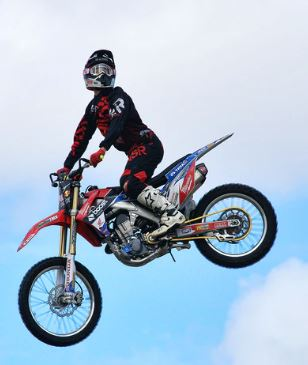

In [8]:
cv2_imshow(image)

In [9]:
image = detect_image(image, yolo, all_classes)
cv2.imwrite('/content/drive/MyDrive/VehicleDetection/data' + f, image)

1/1 [==============================] - 3s 3s/step
time: 4.27s
class: person, score: 1.00
box coordinate x,y,w,h: [ 55.18435925  39.11147535 113.44946826 221.0961917 ]
class: motorbike, score: 1.00
box coordinate x,y,w,h: [ 13.94720674 120.46721354 267.23240972 232.99699217]



True

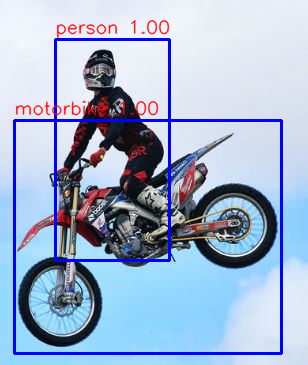

In [10]:
cv2_imshow(image)